Hello there. Welcome back to see my work on my Artificial Intelligence Course - by Assoc. Prof. Nguyen Truong Thinh.\
**Topic: Adaptive Food Suggestion**
>   In this notebook, an adaptive food suggestion is presented. There are 5 input variables, namely: Taste, Environment, Budget, User Review, and Location

**Reference source:** Osman, Tousif, et al. "Adaptive food suggestion engine by fuzzy logic." 2016 IEEE/ACIS 15th International Conference on Computer and Information Science (ICIS). IEEE, 2016.

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=6afa646491d4feb0c966174165c0bbd5c9516f54b3d8a04f96cbc3e2cb753aa7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
# Import libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

**Instance: The Taste**

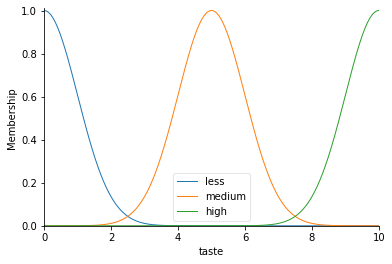

In [ ]:
# Generate categories - Taste
taste = ctrl.Antecedent(np.arange(0.0, 10.01, 0.01), 'taste')

# Then, use them to set ranges for the fuzzy variable
taste['less'] = fuzz.gaussmf(taste.universe, 0.0, 1.0)
taste['medium'] = fuzz.gaussmf(taste.universe, 5.0, 1.0)
taste['high'] = fuzz.gaussmf(taste.universe, 10.0, 1.0)

# Visualization
taste.view()

**Instance: The Budget**

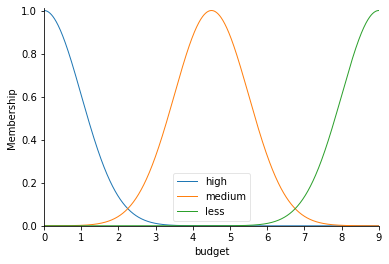

In [ ]:
# Generate categories - Budget
budget = ctrl.Antecedent(np.arange(0.0, 9.01, 0.01), 'budget')

# Then, use them to set ranges for the fuzzy variable
budget['high'] = fuzz.gaussmf(budget.universe, 0.0, 1.0)
budget['medium'] = fuzz.gaussmf(budget.universe, 4.5, 1.0)
budget['less'] = fuzz.gaussmf(budget.universe, 9.0, 1.0)

# Visualization
budget.view()

**Instance: The User Reviews**

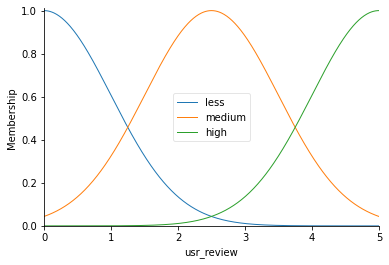

In [ ]:
# Generate categories - User review
usr_review = ctrl.Antecedent(np.arange(0.0, 5.01, 0.01), 'usr_review')

# Then, use them to set ranges for the fuzzy variable
usr_review['less'] = fuzz.gaussmf(usr_review.universe, 0.0, 1.0)
usr_review['medium'] = fuzz.gaussmf(usr_review.universe, 2.5, 1.0)
usr_review['high'] = fuzz.gaussmf(usr_review.universe, 5.0, 1.0)

# Visualization
usr_review.view()

**Instance: The Environment**

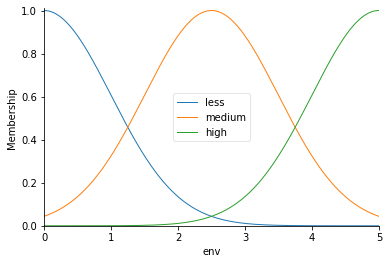

In [ ]:
# Generate categories - Environment
env = ctrl.Antecedent(np.arange(0.0, 5.01, 0.01), 'env')

# Then, use them to set ranges for the fuzzy variable
env['less'] = fuzz.gaussmf(env.universe, 0.0, 1.0)
env['medium'] = fuzz.gaussmf(env.universe, 2.5, 1.0)
env['high'] = fuzz.gaussmf(env.universe, 5.0, 1.0)

# Visualization
env.view()

**Instance: Location**

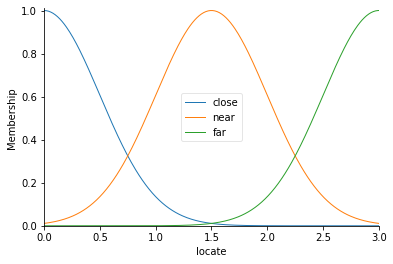

In [ ]:
# Generate categories - Location
locate = ctrl.Antecedent(np.arange(0.0, 3.01, 0.01), 'locate')

# Then, use them to set ranges for the fuzzy variable
locate['close'] = fuzz.gaussmf(locate.universe, 0.0, 0.5)
locate['near'] = fuzz.gaussmf(locate.universe, 1.5, 0.5)
locate['far'] = fuzz.gaussmf(locate.universe, 3.0, 0.5)

# Visualization
locate.view()

**Output: Preference**

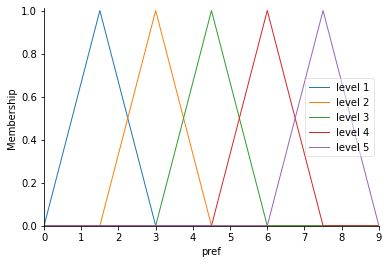

In [ ]:
# Generate data - Preference
pref = ctrl.Consequent(np.arange(0, 9.1, 0.1), 'pref')

# Then, use them to set ranges for the fuzzy variable)
pref['level 1'] = fuzz.trimf(pref.universe, [0.0, 1.5, 3.0])
pref['level 2'] = fuzz.trimf(pref.universe, [1.5, 3.0, 4.5])
pref['level 3'] = fuzz.trimf(pref.universe, [3.0, 4.5, 6.0])
pref['level 4'] = fuzz.trimf(pref.universe, [4.5, 6.0, 7.5])
pref['level 5'] = fuzz.trimf(pref.universe, [6.0, 7.5, 9.0])

# Visualization
pref.view()

**Decision Rules**

**Ineffective way of making rules**
Below here, I will show you how to make rules ineffectively, even without any thoughts

In [ ]:
# Rules
# These rules are my own since the authors didn't show theirs
# There are some categories that decide most of the preference, such as the taste, env, etc.
# The worse food, the lower preference and etc.
rule_lst = [ctrl.Rule(taste['high']&budget['high']&usr_review['high']&env['high']&locate['close'], pref['level 5']),
            ctrl.Rule(taste['high']&budget['medium']&usr_review['high']&env['high']&locate['close'], pref['level 5']), 
            ctrl.Rule(taste['high']&budget['less']&usr_review['high']&env['high']&locate['close'], pref['level 5']), 
            ctrl.Rule(taste['high']&budget['high']&usr_review['high']&env['high']&locate['near'], pref['level 5']), 
            ctrl.Rule(taste['high']&budget['medium']&usr_review['high']&env['high']&locate['near'], pref['level 5']), 
            ctrl.Rule(taste['high']&budget['less']&usr_review['high']&env['high']&locate['near'], pref['level 4']), 
            ctrl.Rule(taste['high']&budget['high']&usr_review['high']&env['high']&locate['far'], pref['level 5']), 
            ctrl.Rule(taste['high']&budget['medium']&usr_review['high']&env['high']&locate['far'], pref['level 4']), 
            ctrl.Rule(taste['high']&budget['less']&usr_review['high']&env['high']&locate['far'], pref['level 3']), 
            ctrl.Rule(taste['high']&budget['medium']&usr_review['high']&env['medium']&locate['close'], pref['level 4']), 
            ctrl.Rule(taste['high']&budget['medium']&usr_review['high']&env['less']&locate['close'], pref['level 3']), 
            ctrl.Rule(taste['high']&budget['medium']&usr_review['high']&env['medium']&locate['far'], pref['level 4']),
            ctrl.Rule(taste['high']&budget['less']&usr_review['high']&env['less']&locate['far'], pref['level 3']),  
            ctrl.Rule(taste['high']&budget['high']&usr_review['medium']&env['high']&locate['close'], pref['level 5']),
            ctrl.Rule(taste['high']&budget['high']&usr_review['less']&env['high']&locate['close'], pref['level 5']), 
            ctrl.Rule(taste['high']&budget['high']&usr_review['medium']&env['high']&locate['near'], pref['level 4']), 
            ctrl.Rule(taste['high']&budget['high']&usr_review['less']&env['high']&locate['near'], pref['level 4']), 
            ctrl.Rule(taste['high']&budget['medium']&usr_review['medium']&env['medium']&locate['close'], pref['level 3']),  
            ctrl.Rule(taste['high']&budget['medium']&usr_review['less']&env['less']&locate['close'], pref['level 3']), 
            ctrl.Rule(taste['high']&budget['less']&usr_review['less']&env['less']&locate['close'], pref['level 2']), 
            ctrl.Rule(taste['high']&budget['medium']&usr_review['medium']&env['medium']&locate['near'], pref['level 2']), 
            ctrl.Rule(taste['high']&budget['less']&usr_review['less']&env['less']&locate['near'], pref['level 2']), 
            ctrl.Rule(taste['high']&budget['medium']&usr_review['medium']&env['medium']&locate['far'], pref['level 1']), 
            ctrl.Rule(taste['high']&budget['less']&usr_review['less']&env['less']&locate['far'], pref['level 1']), 
            ctrl.Rule(taste['medium']&budget['high']&usr_review['high']&env['high']&locate['close'], pref['level 3']),
            ctrl.Rule(taste['medium']&budget['medium']&usr_review['high']&env['high']&locate['close'], pref['level 3']),
            ctrl.Rule(taste['medium']&budget['less']&usr_review['high']&env['high']&locate['close'], pref['level 3']),
            ctrl.Rule(taste['medium']&budget['medium']&usr_review['medium']&env['medium']&locate['close'], pref['level 3']),
            ctrl.Rule(taste['medium']&budget['medium']&usr_review['less']&env['high']&locate['close'], pref['level 3']),
            ctrl.Rule(taste['medium']&budget['medium']&usr_review['high']&env['less']&locate['close'], pref['level 2']),
            ctrl.Rule(taste['medium']&budget['medium']&usr_review['high']&env['high']&(locate['near']|locate['far']), pref['level 3']),
            ctrl.Rule(taste['medium']&budget['less']&usr_review['less']&env['less']&locate['close'], pref['level 2']),
            ctrl.Rule(taste['medium']&budget['less']&usr_review['high']&env['less']&locate['far'], pref['level 1']),
            ctrl.Rule(taste['medium']&budget['medium']&usr_review['less']&env['less']&locate['far'], pref['level 1']),
            ctrl.Rule(taste['medium']&budget['medium']&usr_review['high']&env['less']&locate['near'], pref['level 1']),
            ctrl.Rule(taste['medium']&budget['medium']&usr_review['less']&env['less']&locate['near'], pref['level 1']),
            ctrl.Rule(taste['medium']&budget['less']&usr_review['less']&env['less']&locate['near'], pref['level 1']),
            ctrl.Rule(taste['less']&env['less']&locate['far'], pref['level 1']),
            ctrl.Rule(taste['less']&budget['less'], pref['level 1']),
          ]

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

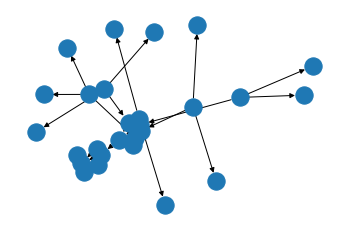

In [ ]:
# Take a look of rule
chosen_idx = 34     # Must be smaller than: len(rule_lst) - 1
rule_lst[chosen_idx].view()

As shown, most of them are quite sparse, not too complex

**More effective way to handle rules**
Previously, I have shown a stupid way to make rules without logical consideration\ This time, I will make it better

In [ ]:
# Rules - With better approachs
rule_modlst = [ctrl.Rule(taste['high']&(budget['high']|budget['medium']|budget['less'])&(usr_review['high']|usr_review['medium']|usr_review['less'])&env['high']&(locate['close']|locate['near']), pref['level 5']),
               ctrl.Rule(taste['high']&(budget['high']|budget['medium']|budget['less'])&(usr_review['high']|usr_review['medium']|usr_review['less'])&env['high']&locate['far'], pref['level 4']),
               ctrl.Rule(taste['high']&(budget['high']|budget['medium']|budget['less'])&(usr_review['high']|usr_review['medium']|usr_review['less'])&(locate['close']|locate['near']|locate['far'])&env['medium'], pref['level 4']),
               ctrl.Rule(taste['high']&(budget['high']|budget['medium']|budget['less'])&(usr_review['high']|usr_review['medium']|usr_review['less'])&(locate['close']|locate['near']|locate['far'])&env['less'], pref['level 2']),
               ctrl.Rule(taste['medium']&(budget['high']|budget['medium']|budget['less'])&(usr_review['high']|usr_review['medium']|usr_review['less'])&(locate['close']|locate['near']|locate['far'])&env['high'], pref['level 3']),
               ctrl.Rule(taste['medium']&(budget['high']|budget['medium']|budget['less'])&(usr_review['high']|usr_review['medium']|usr_review['less'])&(locate['close']|locate['near']|locate['far'])&env['medium'], pref['level 2']),
               ctrl.Rule(taste['medium']&(budget['high']|budget['medium']|budget['less'])&(usr_review['high']|usr_review['medium']|usr_review['less'])&(locate['close']|locate['near']|locate['far'])&env['less'], pref['level 2']),
               ctrl.Rule(taste['less']&(budget['high']|budget['medium']|budget['less'])&(usr_review['high']|usr_review['medium']|usr_review['less'])&(env['high']|env['medium']|env['less'])&(locate['close']|locate['near']|locate['far']), pref['level 1'])
]

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

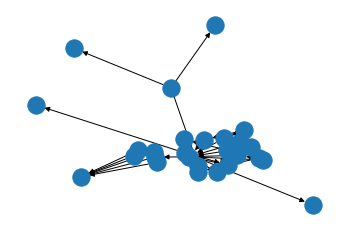

In [ ]:
# Take a look of rule
chosen_idx = 5     # Must be smaller than: len(rule_modlst) - 1
rule_modlst[chosen_idx].view()

**Mod-Rule Training**

In [ ]:
# Train and Create a predictor
adapfood_modpredictor = ctrl.ControlSystem(rule_modlst)
adapfood_modpred = ctrl.ControlSystemSimulation(adapfood_modpredictor)

**Raw-Rule Training**

In [ ]:
# Train and Create a predictor
adapfood_predictor = ctrl.ControlSystem(rule_lst)
adapfood_pred = ctrl.ControlSystemSimulation(adapfood_predictor)

**Test 1**

Raw-creating Rules

Predicted: 5.13583225404152


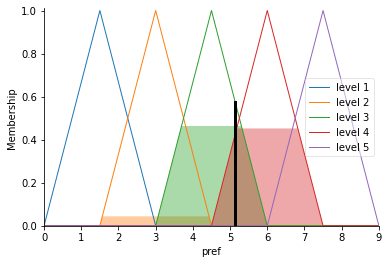

In [ ]:
# Test an instance
adapfood_pred.input['taste']  = 10.0      # Good Taste
adapfood_pred.input['budget'] = 4.5       # Medium Preferenced to Pay
adapfood_pred.input['usr_review'] = 9.0   # Good Review
adapfood_pred.input['env'] = 1.24         # Medium Environment
adapfood_pred.input['locate'] = 0.34      # Close to Neighborhood
adapfood_pred.compute()

# Print
pred_res = adapfood_pred.output['pref']
dis_str = "Predicted: {lvl}".format(lvl = pred_res)   # Print predicted value
print(dis_str)
pref.view(sim = adapfood_pred)   # Display on graph

Modified Rules

Predicted: 4.4891425883282015


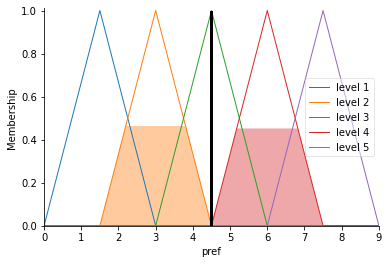

In [ ]:
# Test an instance
adapfood_modpred.input['taste']  = 10.0      # Good Taste
adapfood_modpred.input['budget'] = 4.5       # Medium Preferenced to Pay
adapfood_modpred.input['usr_review'] = 9.0   # Good Review
adapfood_modpred.input['env'] = 1.24         # Medium Environment
adapfood_modpred.input['locate'] = 0.34      # Close to Neighborhood
adapfood_modpred.compute()

# Print
modpred_res = adapfood_modpred.output['pref']
dis_str = "Predicted: {lvl}".format(lvl = modpred_res)   # Print predicted value
print(dis_str)
pref.view(sim = adapfood_modpred)   # Display on graph

**Test 2**

Raw-creating Rules

Predicted: 1.5004139703634654


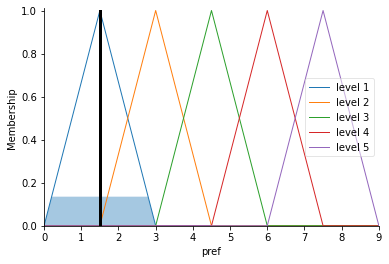

In [ ]:
# Test an instance
adapfood_pred.input['taste']  = 5.0       # Medium Taste
adapfood_pred.input['budget'] = 4.5       # Medium Preferenced to Pay
adapfood_pred.input['usr_review'] = 4.56  # medium Review
adapfood_pred.input['env'] = 0.2          # Worst Environment
adapfood_pred.input['locate'] = 2.5       # Far
adapfood_pred.compute()

# Print
pred_res = adapfood_pred.output['pref']
dis_str = "Predicted: {lvl}".format(lvl = pred_res)   # Print predicted value
print(dis_str)
pref.view(sim = adapfood_pred)   # Display on graph

Modified Rules

Predicted: 3.000056553757892


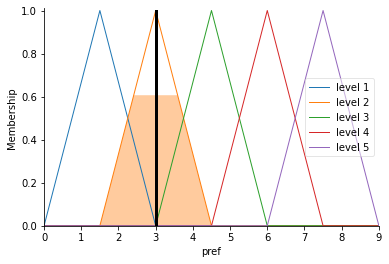

In [ ]:
# Test an instance
adapfood_modpred.input['taste']  = 5.0       # Medium Taste
adapfood_modpred.input['budget'] = 4.5       # Medium Preferenced to Pay
adapfood_modpred.input['usr_review'] = 4.56  # medium Review
adapfood_modpred.input['env'] = 0.2          # Worst Environment
adapfood_modpred.input['locate'] = 2.5       # Far
adapfood_modpred.compute()


# Print
modpred_res = adapfood_modpred.output['pref']
dis_str = "Predicted: {lvl}".format(lvl = modpred_res)   # Print predicted value
print(dis_str)
pref.view(sim = adapfood_modpred)   # Display on graph

**Test 3**

Raw-creating Rules

Predicted: 1.5502174056048532


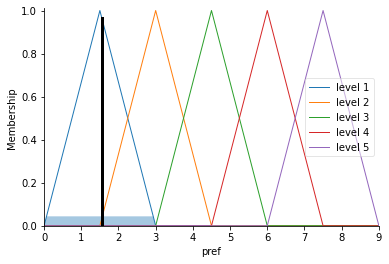

In [ ]:
# Test an instance
adapfood_pred.input['taste']  = 1.2       # Worst Taste
adapfood_pred.input['budget'] = 1.5       # Less Preferenced to Pay
adapfood_pred.input['usr_review'] = 1.2   # Bad Review
adapfood_pred.input['env'] = 2.5          # Medium Environment
adapfood_pred.input['locate'] = 2.5       # Far
adapfood_pred.compute()

# Print
pred_res = adapfood_pred.output['pref']
dis_str = "Predicted: {lvl}".format(lvl = pred_res)   # Print predicted value
print(dis_str)
pref.view(sim = adapfood_pred)   # Display on graph

Modified Rules

Predicted: 1.508114117874175


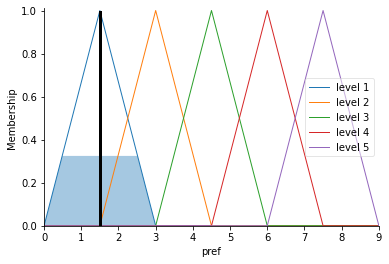

In [ ]:
# Test an instance
adapfood_modpred.input['taste']  = 1.2       # Worst Taste
adapfood_modpred.input['budget'] = 1.5       # Less Preferenced to Pay
adapfood_modpred.input['usr_review'] = 1.2   # Bad Review
adapfood_modpred.input['env'] = 2.5          # Medium Environment
adapfood_modpred.input['locate'] = 2.5       # Far
adapfood_modpred.compute()

# Print
modpred_res = adapfood_modpred.output['pref']
dis_str = "Predicted: {lvl}".format(lvl = modpred_res)   # Print predicted value
print(dis_str)
pref.view(sim = adapfood_modpred)   # Display on graph

The two approachs are quite close in the output scores. So, why do I call them modified and raw?\
The raw one is when we consider each combination corresponding to each result. In the case of the modified, those raw are made simpler by combining rules together and getting rid of redundancy.